<a href="https://colab.research.google.com/github/ravimishragit/fastai/blob/master/fastai_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [4]:
!pwd

/content


In [15]:
!ls /content/Cats/

00000000.jpg   00000043.jpg   00000082.png   00000121.jpg   00000161.jpg
00000001.png   00000044.jpg   00000083.jpg   00000122.jpg   00000162.jpg
00000002.jpg   00000045.jpeg  00000084.jpg   00000123.jpg   00000163.jpg
00000003.jpg   00000046.jpg   00000085.jpg   00000124.jpg   00000164.jpg
00000004.jpg   00000047.jpg   00000086.jpg   00000125.jpg   00000165.jpg
00000005.jpg   00000048.jpg   00000087.jpg   00000126.jpg   00000166.jpg
00000006.jpg   00000049.jpg   00000088.jpg   00000127.jpg   00000167.jpg
00000007.jpg   00000050.jpg   00000089.jpg   00000128.jpg   00000168.jpg
00000008.jpg   00000051.jpg   00000090.jpg   00000129.jpg   00000169.jpg
00000009.jpg   00000052.jpg   00000091.jpg   00000130.jpg   00000170.jpg
00000010.jpg   00000053.jpg   00000092.jpg   00000131.jpg   00000171.jpg
00000011.png   00000054.jpg   00000093.jpg   00000132.jpg   00000172.jpeg
00000012.png   00000055.jpg   00000094.jpg   00000133.jpg   00000173.jpg
00000013.jpg   00000056.jpg   00000095.jpg   00000

In [0]:
path = Path('/content')

In [0]:
for file, folder in [('cats.csv', 'Cats'), ('cows.csv', 'Cows'), 
                     ('dogs.csv', 'Dogs'), ('horses.csv', 'Horses')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

In [0]:
for file, folder in [('elephants.csv', 'Elephants')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

In [7]:
doc(verify_images)

In [0]:
for folder in ('Cats', 'Cows', 'Dogs', 'Horses','Elephants'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['Cats', 'Cows', 'Dogs', 'Elephants', 'Horses']

In [22]:
doc(data.show_batch)

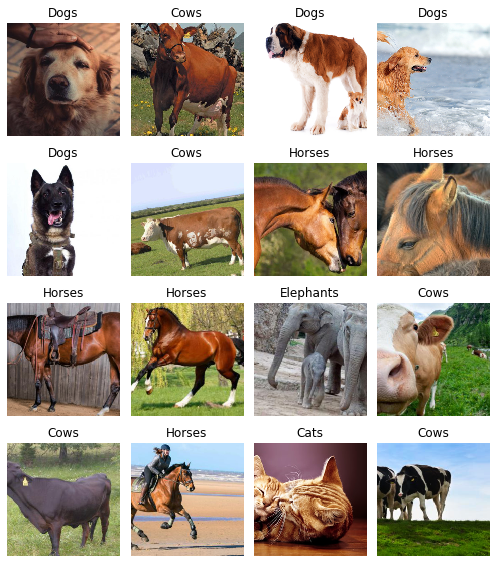

In [23]:
data.show_batch(rows=4, figsize=(7, 8))

In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cats', 'Cows', 'Dogs', 'Elephants', 'Horses'], 5, 757, 189)

In [25]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 57.0MB/s]


In [26]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (757 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Horses,Horses,Horses,Horses,Horses
Path: /content;

Valid: LabelList (189 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cows,Horses,Cats,Dogs,Horses
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [27]:
doc(learn.fit_one_cycle)

In [28]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.608203,0.241329,0.063492,04:27
1,0.835227,0.163632,0.047619,04:28
2,0.548418,0.157065,0.042328,04:28
3,0.392079,0.160874,0.047619,04:30


In [0]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


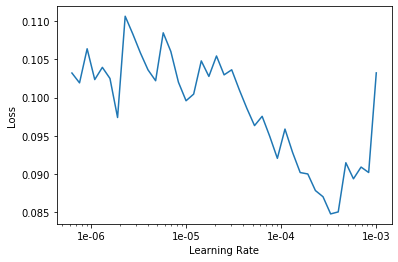

In [31]:
learn.recorder.plot()

In [32]:

learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.117550,0.166314,0.037037,06:18
1,0.105122,0.130016,0.037037,06:16
2,0.090049,0.104485,0.047619,06:15
3,0.081232,0.103719,0.042328,06:15


In [0]:
learn.save('animal-detection-stage-1')

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(ds, idxs, path)